In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [110]:
hdata1=pd.read_excel('health.xlsx', sheet_name='2016-17')
hdata2=pd.read_excel('health.xlsx', sheet_name='2017-18')
hdata3=pd.read_excel('health.xlsx', sheet_name='2018-19')
hdata4=pd.read_excel('health.xlsx', sheet_name='2019-20')
hdata5=pd.read_excel('health.xlsx', sheet_name='2020-21')

In [111]:
df = pd.concat([hdata1,hdata2,hdata3,hdata4,hdata5],ignore_index=True)

In [112]:
df

P.No.                  Name    Test Date  Year  Cycle Gender  Age  \
0     306708       Shyamjee Prasad  21-Jan-2017  2016      1   Male   44   
1     306833          Sanjay Kumar  30-Sep-2016  2016      1   Male   43   
2     302238             S D Singh  12-Jul-2016  2016      2   Male   63   
3     302474      Shatrughna Singh  14-May-2016  2016      1   Male   64   
4     302486      Sheo Kumar Singh  21-Jan-2017  2016      1   Male   64   
...      ...                   ...          ...   ...    ...    ...  ...   
3976  389122            Ajay Kumar  09-Dec-2020  2020      1   Male   40   
3977  382936    Shyam Sundra Singh  05-Sep-2020  2020      1   Male   50   
3978  381539            Aslam Khan  07-Sep-2020  2020      1   Male   55   
3979  390310            Kausik Sen  17-Jul-2020  2020      1   Male   42   
3980  389265  Jitendra Kumar Yadav  09-Dec-2020  2020      1   Male   37   

      Height  Weight                                      Division  ...  ECG  \
0      180.0      83  Vehicle Factory (excluding vehicle dispatch)  ...  NaN   
1      169.0      72  Vehicle Factory (excluding vehicle dispatch)  ...  WNL   
2      175.0      85  Vehicle Factory (excluding vehicle dispatch)  ...  NaN   
3      166.0      64  Vehicle Factory (excluding vehicle dispatch)  ...  NaN   
4      164.0      84  Vehicle Factory (excluding vehicle dispatch)  ...  NaN   
...      ...     ...                                           ...  ...  ...   
3976   177.0      75  Vehicle Factory (excluding vehicle dispatch)  ...  NaN   
3977   177.0      76  Vehicle Factory (excluding vehicle dispatch)  ...  NaN   
3978   167.0      78  Vehicle Factory (excluding vehicle dispatch)  ...  NaN   
3979   169.0      69  Vehicle Factory (excluding vehicle dispatch)  ...  NaN   
3980   175.0      73  Vehicle Factory (excluding vehicle dispatch)  ...  NaN   

     ECG Remarks TMT Status   TMT Date  TMT Remarks  \
0            NaN   Negative        NaN          NaN   
1            NaN   Negative        NaN          NaN   
2            NaN   Negative        NaN          NaN   
3            NaN   Negative        NaN          NaN   
4            NaN   Negative        NaN          NaN   
...          ...        ...        ...          ...   
3976         NaN        NaN        NaN          NaN   
3977         NaN   Negative  11-MAR-21          NaN   
3978         NaN        NaN        NaN          NaN   
3979         NaN   Negative        NaN          NaN   
3980         NaN        NaN        NaN          NaN   

     Systematic Examination Remarks Grade                     Area  \
0                               NaN   E-4         CX - Chasis Assy   
1                               NaN   E-6         Chassis Assembly   
2                               NaN  TM-A   Vehicle Factory Maint.   
3                               NaN   NaN                      NaN   
4                               NaN   NaN                      NaN   
...                             ...   ...                      ...   
3976                            NaN   E-4         CX - Chasis Assy   
3977                             97   E-2      Prod   Ctrl (Truck)   
3978                           98.6   E-2         CX - Chasis Assy   
3979                          97. F   E-3   Vehicle Factory Maint.   
3980                            NaN   E-4  Chassis Assembly Line 1   

           Phone  Email  
0     7970480859    NaN  
1     8092730508    NaN  
2            NaN    NaN  
3            NaN    NaN  
4            NaN    NaN  
...          ...    ...  
3976  9279215589    NaN  
3977  9955218232    NaN  
3978  7061590924    NaN  
3979  8797943139    NaN  
3980  9234897941    NaN  

[3981 rows x 50 columns]

<AxesSubplot:>

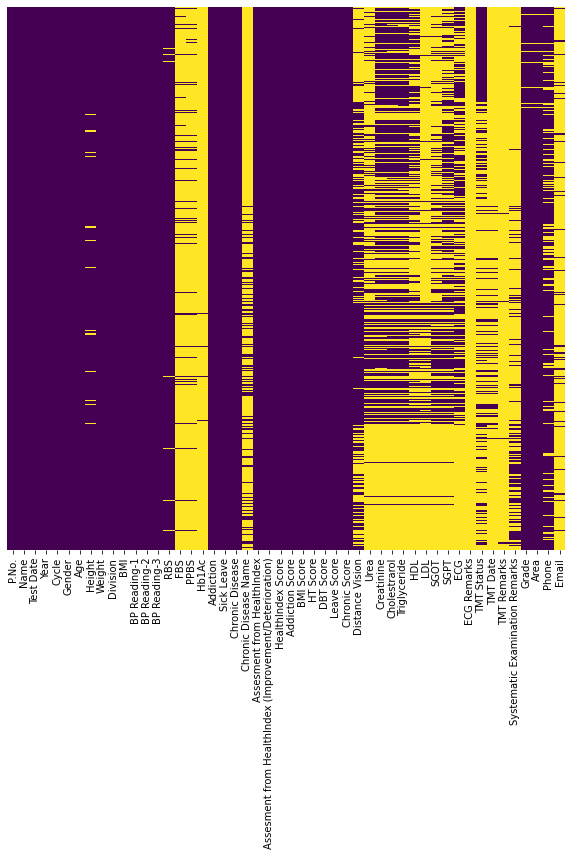

In [113]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [114]:
df.drop(['P.No.','Cycle','Name','Test Date','Year','Systematic Examination Remarks','Grade','Phone','Email','Division','BP Reading-2','BP Reading-3','FBS','PPBS','Hb1Ac','Chronic Disease Name','Distance Vision','LDL','ECG Remarks','TMT Date','TMT Remarks','HealthIndex Score','Assesment from HealthIndex (Improvement/Deterioration)','Addiction Score','BMI Score','HT Score','DBT Score','Leave Score','Chronic Score','ECG','TMT Status','Urea','SGOT','HDL'], axis=1, inplace=True)

<AxesSubplot:>

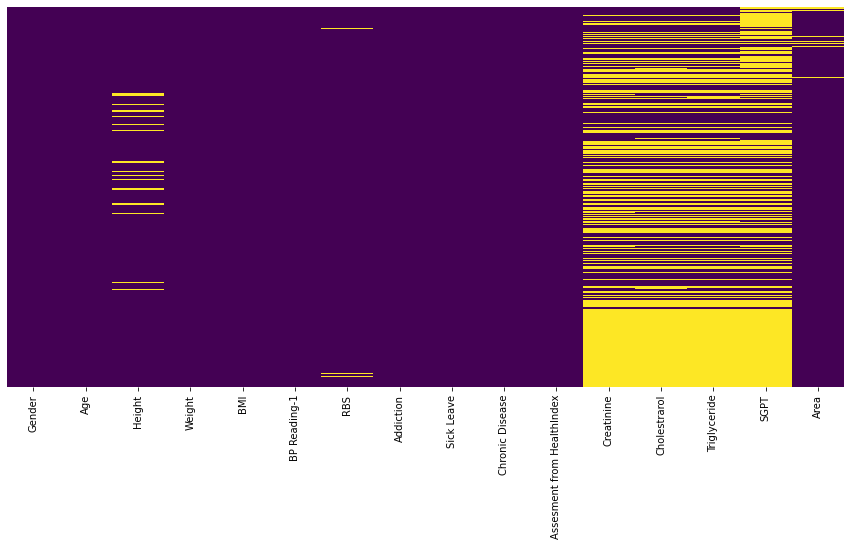

In [115]:
plt.figure(figsize=(15,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [116]:
df.head()

Gender  Age  Height  Weight    BMI BP Reading-1    RBS Addiction  \
0   Male   44   180.0      83  25.06       130/80   84.0         Y   
1   Male   43   169.0      72  25.21      170/110  116.0         N   
2   Male   63   175.0      85  27.76       130/80  181.0         Y   
3   Male   64   166.0      64  23.23       120/80   94.0         Y   
4   Male   64   164.0      84  31.23       150/90  102.0         Y   

   Sick Leave Chronic Disease Assesment from HealthIndex Creatinine  \
0         0.0               N             Average Health          1   
1         4.0               N                Best Health          1   
2         9.0               N             Average Health        nil   
3         4.0               Y             Average Health        NaN   
4         1.0               N             Average Health        NaN   

  Cholestrarol Triglyceride SGPT                    Area  
0          NaN          NaN  NaN        CX - Chasis Assy  
1          218          153  NaN        Chassis Assembly  
2          nil          nil  NaN  Vehicle Factory Maint.  
3          NaN          NaN  NaN                     NaN  
4          NaN          NaN  NaN                     NaN

In [117]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)
df.drop_duplicates(inplace=True)
ndups = df.duplicated()
print('Number of duplicate rows = %d' % (ndups.sum()))
print(df.shape)

Number of duplicate rows = 12
(3981, 16)
Number of duplicate rows = 0
(3969, 16)


In [118]:
df.Area.value_counts(normalize=True)

CX - Chasis Assy                            0.314971
Chassis Assembly Line 1                     0.207345
Chassis Assembly                            0.172915
Rec. (Normal/Exp. Ch                        0.111961
Vehicle Factory Maint.                      0.034685
                                              ...   
BHR                                         0.000255
Heavy Cab Fabrication Main Line-Edag Lin    0.000255
Inspection  (Auto)                          0.000255
Front Axle beam line - SPM Line             0.000255
DHBU MAINTENANCE                            0.000255
Name: Area, Length: 65, dtype: float64

In [119]:
 print(df.Area.unique())

['CX - Chasis Assy' 'Chassis Assembly' 'Vehicle Factory Maint.' nan
 'Chassis Assembly Line 1' 'Rec. (Normal/Exp. Ch' 'Elect. Maint. (Truck'
 'Vehicle Testing' 'EOL & Care Line' 'Silencer & Small Par'
 'Mech. Maint. (Truck)' 'Prod   Ctrl (Truck)' 'Chassis Assembly -II'
 'Vehicle Preparation' 'Maintenance & Planning' 'Prod Ctrl (Cab&Cowl)'
 'Chassis Assy Line-4' 'Rectification Painti' 'Paint Shop  (Frame)'
 'PPL & Order Fulfilment' 'Mech. Maint.(Truck-P' 'Engine Testing'
 'Mfg. QA (Veh Fact)' 'CX - Trim Line' 'FPIG' 'CX - Frame Shop'
 'Production Inspectio' 'SMD Assembly' 'Scheduling and Procurement'
 'Engine Assy Long Block Assembly' 'EGP Sub-Assembly' 'Beta proto Shop'
 'Product Line Operations' 'Experimental Shop-JSPR'
 'Frame Assy. (Rivetti Frame Assy 1'
 'Ware Housing & Logistics (Veh & Frame)' 'Trainees (Employees'
 'Power supply' 'Vehicle storage (Off'
 'Ware Housing (Cab & Cowl and Engine)' 'Electrical Maint (Tr'
 'Inspection  (Auto)' 'LP Cowl Fitment' 'Maintenance'
 'Jamshedpur

In [120]:
df.Area=pd.Categorical(df.Area,{'CX - Chasis Assy','Chassis Assembly','Vehicle Factory Maint.','Chassis Assembly Line 1','Rec.(Normal/Exp. Ch','Elect. Maint. (Truck','Vehicle Testing','EOL & Care Line','Silencer & Small Par','Mech. Maint. (Truck)','Prod   Ctrl (Truck)','Chassis Assembly -II','Vehicle Preparation','Maintenance & Planning','Prod Ctrl (Cab&Cowl)','Chassis Assy Line-4','Rectification Painti','Paint Shop  (Frame)','PPL & Order Fulfilment','Mech. Maint.(Truck-P','Engine Testing','Mfg. QA (Veh Fact)','CX - Trim Line','FPIG','CX - Frame Shop','Production Inspectio','SMD Assembly','Scheduling and Procurement','Engine Assy Long Block Assembly','EGP Sub-Assembly','Beta proto Shop','Product Line Operations','Experimental Shop-JSPR','Frame Assy. (Rivetti Frame Assy 1','Ware Housing & Logistics (Veh & Frame)','Trainees (Employees','Power supply','Vehicle storage (Off','Ware Housing (Cab & Cowl and Engine)','Electrical Maint (Tr','Inspection  (Auto)','LP Cowl Fitment','Maintenance','Jamshedpur CV Works','Production Control (Prima & A/L-III)','Vehicle Factory','Synchro Soft - Swaging','Paint Mixing (Auto)','SQIG','CQ-NOVUS','Centralised Paint Sh','Centralised Cab & Co','Frame Assy. (Rivetti','CX - BIW','DHBU MAINTENANCE','Rear Axle Assembly Misc Common Activity','Speed Gear Grinding','Vehicle storage (Sto' '713/909 Cowl Fabn Tilt Cab Main line','Heavy Cab Fabrication Main Line-Edag Lin','Assy Line 1,2 & 3 - Sub Assembly','Front Axle beam line - SPM Line','Paint Shop  (Long Me','Defence','BHR'},ordered=True)
df.Area

0              CX - Chasis Assy
1              Chassis Assembly
2        Vehicle Factory Maint.
3                           NaN
4                           NaN
                 ...           
3976           CX - Chasis Assy
3977        Prod   Ctrl (Truck)
3978           CX - Chasis Assy
3979     Vehicle Factory Maint.
3980    Chassis Assembly Line 1
Name: Area, Length: 3969, dtype: category
Categories (64, object): ['Inspection  (Auto)' < 'Vehicle Preparation' < 'Heavy Cab Fabrication Main Line-Edag Lin' < 'Trainees (Employees' ... 'Product Line Operations' < 'Production Inspectio' < 'Scheduling and Procurement' < 'Maintenance & Planning']

In [121]:
df.Area=df.Area.cat.codes
df.Area 

0       56
1       32
2       30
3       -1
4       -1
        ..
3976    56
3977    29
3978    56
3979    30
3980    31
Name: Area, Length: 3969, dtype: int8

In [122]:
df.Gender=pd.Categorical(df.Gender,{'Male','Female'},ordered=True)
df.Gender=df.Gender.cat.codes
df.Gender #MALE=0,FEMALE=1

0       0
1       0
2       0
3       0
4       0
       ..
3976    0
3977    0
3978    0
3979    0
3980    0
Name: Gender, Length: 3969, dtype: int8

In [123]:
df.Addiction=pd.Categorical(df.Addiction,{'Y','N'},ordered=True)
df.Addiction=df.Addiction.cat.codes
df.Addiction  #Y=1,N=0

0       1
1       0
2       1
3       1
4       1
       ..
3976    0
3977    0
3978    0
3979    0
3980    0
Name: Addiction, Length: 3969, dtype: int8

In [124]:
df.rename(columns={'Chronic Disease':'Chronic_Disease'},inplace=True)
df.Chronic_Disease=pd.Categorical(df.Chronic_Disease,{'Y','N'},ordered=True)
df.Chronic_Disease=df.Chronic_Disease.cat.codes
df.Chronic_Disease #Y=1,N=0

0       0
1       0
2       0
3       1
4       0
       ..
3976    0
3977    0
3978    1
3979    0
3980    0
Name: Chronic_Disease, Length: 3969, dtype: int8

In [125]:
print(df.shape)

for column in df.columns:
    df.drop(index = df[df[column] == 'nil'].index,inplace=True)

print(df.shape)

(3969, 16)
(3968, 16)


In [126]:
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)

In [127]:
df.rename(columns={'BP Reading-1':'BP'},inplace=True)
df['SBP']=np.nan
df['DBP']=np.nan
df[['SBP','DBP']]=df['BP'].str.split('/',expand=True)
df.drop(['BP'],axis=1,inplace=True)

In [128]:
df.rename(columns={'Assesment from HealthIndex':'Conclusion'},inplace=True)
df.Conclusion=pd.Categorical(df.Conclusion,{'Best Health','Average Health','Poor Health'},ordered=True)
df.Conclusion=df.Conclusion.cat.codes
df.Conclusion #AverageHealth=0, BestHealth=1, PoorHealth=2

0       0
1       1
2       0
3       0
4       0
       ..
3963    1
3964    1
3965    0
3966    1
3967    1
Name: Conclusion, Length: 3968, dtype: int8

In [129]:
df

Gender  Age  Height  Weight    BMI    RBS  Addiction  Sick Leave  \
0          0   44   180.0      83  25.06   84.0          1         0.0   
1          0   43   169.0      72  25.21  116.0          0         4.0   
2          0   64   166.0      64  23.23   94.0          1         4.0   
3          0   64   164.0      84  31.23  102.0          1         1.0   
4          0   63   166.0      80  29.03  113.0          0        12.0   
...      ...  ...     ...     ...    ...    ...        ...         ...   
3963       0   40   177.0      75  23.94  151.0          0         0.0   
3964       0   50   177.0      76  24.26  130.0          0         0.0   
3965       0   55   167.0      78  27.97    NaN          0         0.0   
3966       0   42   169.0      69  24.16  130.0          0         0.0   
3967       0   37   175.0      73  23.84   91.0          0         0.0   

      Chronic_Disease  Conclusion Creatinine Cholestrarol Triglyceride  SGPT  \
0                   0           0          1          NaN          NaN   NaN   
1                   0           1          1          218          153   NaN   
2                   1           0        NaN          NaN          NaN   NaN   
3                   0           0        NaN          NaN          NaN   NaN   
4                   0           0          1          196          148  41.0   
...               ...         ...        ...          ...          ...   ...   
3963                0           1        NaN          NaN          NaN   NaN   
3964                0           1        NaN          NaN          NaN   NaN   
3965                1           0        NaN          NaN          NaN   NaN   
3966                0           1        NaN          NaN          NaN   NaN   
3967                0           1        NaN          NaN          NaN   NaN   

      Area  SBP  DBP  
0       56  130   80  
1       32  170  110  
2       -1  120   80  
3       -1  150   90  
4       -1  110   70  
...    ...  ...  ...  
3963    56  130   80  
3964    29  140   90  
3965    56  170   90  
3966    30  110   80  
3967    31  120   80  

[3968 rows x 17 columns]

In [130]:
#df.drop(['level_0'],axis=1,inplace=True)

In [131]:
df.rename(columns={'Sick Leave':'Sick_L'},inplace=True)

In [132]:
df

Gender  Age  Height  Weight    BMI    RBS  Addiction  Sick_L  \
0          0   44   180.0      83  25.06   84.0          1     0.0   
1          0   43   169.0      72  25.21  116.0          0     4.0   
2          0   64   166.0      64  23.23   94.0          1     4.0   
3          0   64   164.0      84  31.23  102.0          1     1.0   
4          0   63   166.0      80  29.03  113.0          0    12.0   
...      ...  ...     ...     ...    ...    ...        ...     ...   
3963       0   40   177.0      75  23.94  151.0          0     0.0   
3964       0   50   177.0      76  24.26  130.0          0     0.0   
3965       0   55   167.0      78  27.97    NaN          0     0.0   
3966       0   42   169.0      69  24.16  130.0          0     0.0   
3967       0   37   175.0      73  23.84   91.0          0     0.0   

      Chronic_Disease  Conclusion Creatinine Cholestrarol Triglyceride  SGPT  \
0                   0           0          1          NaN          NaN   NaN   
1                   0           1          1          218          153   NaN   
2                   1           0        NaN          NaN          NaN   NaN   
3                   0           0        NaN          NaN          NaN   NaN   
4                   0           0          1          196          148  41.0   
...               ...         ...        ...          ...          ...   ...   
3963                0           1        NaN          NaN          NaN   NaN   
3964                0           1        NaN          NaN          NaN   NaN   
3965                1           0        NaN          NaN          NaN   NaN   
3966                0           1        NaN          NaN          NaN   NaN   
3967                0           1        NaN          NaN          NaN   NaN   

      Area  SBP  DBP  
0       56  130   80  
1       32  170  110  
2       -1  120   80  
3       -1  150   90  
4       -1  110   70  
...    ...  ...  ...  
3963    56  130   80  
3964    29  140   90  
3965    56  170   90  
3966    30  110   80  
3967    31  120   80  

[3968 rows x 17 columns]

In [133]:
df['RBS'] = df['RBS'].fillna(value=df['RBS'].median())

In [134]:
print(df.shape)

for column in df.columns:
    df.drop(index = df[df[column] == 'v'].index,inplace=True)

print(df.shape)

(3968, 17)
(3967, 17)


In [135]:
print(df.shape)

for column in df.columns:
    df.drop(index = df[df[column] == 'Nil'].index,inplace=True)

print(df.shape)

(3967, 17)
(3959, 17)


In [136]:
print(df.shape)

for column in df.columns:
    df.drop(index = df[df[column] == '0.9q'].index,inplace=True)

print(df.shape)

(3959, 17)
(3958, 17)


In [137]:
print(df.shape)

for column in df.columns:
    df.drop(index = df[df[column] == '-1'].index,inplace=True)

print(df.shape)

(3958, 17)
(3958, 17)


In [138]:
df['Triglyceride'] = df['Triglyceride'].fillna(value=df['Triglyceride'].median())
df['SGPT'] = df['SGPT'].fillna(value=df['SGPT'].median())
df['Cholestrarol'] = df['Cholestrarol'].fillna(value=df['Cholestrarol'].median())
df['Creatinine'] = df['Creatinine'].fillna(value=df['Creatinine'].median())
df['Area'] = df['Area'].fillna(value=df['Area'].median())

In [139]:
df

Gender  Age  Height  Weight    BMI    RBS  Addiction  Sick_L  \
0          0   44   180.0      83  25.06   84.0          1     0.0   
1          0   43   169.0      72  25.21  116.0          0     4.0   
2          0   64   166.0      64  23.23   94.0          1     4.0   
3          0   64   164.0      84  31.23  102.0          1     1.0   
4          0   63   166.0      80  29.03  113.0          0    12.0   
...      ...  ...     ...     ...    ...    ...        ...     ...   
3963       0   40   177.0      75  23.94  151.0          0     0.0   
3964       0   50   177.0      76  24.26  130.0          0     0.0   
3965       0   55   167.0      78  27.97  118.0          0     0.0   
3966       0   42   169.0      69  24.16  130.0          0     0.0   
3967       0   37   175.0      73  23.84   91.0          0     0.0   

      Chronic_Disease  Conclusion Creatinine Cholestrarol  Triglyceride  SGPT  \
0                   0           0          1        164.0         151.0  29.0   
1                   0           1          1          218         153.0  29.0   
2                   1           0        0.9        164.0         151.0  29.0   
3                   0           0        0.9        164.0         151.0  29.0   
4                   0           0          1          196         148.0  41.0   
...               ...         ...        ...          ...           ...   ...   
3963                0           1        0.9        164.0         151.0  29.0   
3964                0           1        0.9        164.0         151.0  29.0   
3965                1           0        0.9        164.0         151.0  29.0   
3966                0           1        0.9        164.0         151.0  29.0   
3967                0           1        0.9        164.0         151.0  29.0   

      Area  SBP  DBP  
0       56  130   80  
1       32  170  110  
2       -1  120   80  
3       -1  150   90  
4       -1  110   70  
...    ...  ...  ...  
3963    56  130   80  
3964    29  140   90  
3965    56  170   90  
3966    30  110   80  
3967    31  120   80  

[3958 rows x 17 columns]

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3958 entries, 0 to 3967
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           3958 non-null   int8   
 1   Age              3958 non-null   int64  
 2   Height           3822 non-null   float64
 3   Weight           3958 non-null   int64  
 4   BMI              3958 non-null   float64
 5   RBS              3958 non-null   float64
 6   Addiction        3958 non-null   int8   
 7   Sick_L           3956 non-null   float64
 8   Chronic_Disease  3958 non-null   int8   
 9   Conclusion       3958 non-null   int8   
 10  Creatinine       3958 non-null   object 
 11  Cholestrarol     3958 non-null   object 
 12  Triglyceride     3958 non-null   float64
 13  SGPT             3958 non-null   float64
 14  Area             3958 non-null   int8   
 15  SBP              3958 non-null   object 
 16  DBP              3958 non-null   object 
dtypes: float64(6),

In [141]:
df["SBP"] = pd.to_numeric(df["SBP"], downcast="integer")
df["DBP"] = pd.to_numeric(df["DBP"], downcast="integer")
df["Creatinine"] = pd.to_numeric(df["Creatinine"], downcast="integer")
df["Cholestrarol"] = pd.to_numeric(df["Cholestrarol"], downcast="integer")

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3958 entries, 0 to 3967
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           3958 non-null   int8   
 1   Age              3958 non-null   int64  
 2   Height           3822 non-null   float64
 3   Weight           3958 non-null   int64  
 4   BMI              3958 non-null   float64
 5   RBS              3958 non-null   float64
 6   Addiction        3958 non-null   int8   
 7   Sick_L           3956 non-null   float64
 8   Chronic_Disease  3958 non-null   int8   
 9   Conclusion       3958 non-null   int8   
 10  Creatinine       3958 non-null   float64
 11  Cholestrarol     3958 non-null   float64
 12  Triglyceride     3958 non-null   float64
 13  SGPT             3958 non-null   float64
 14  Area             3958 non-null   int8   
 15  SBP              3938 non-null   float64
 16  DBP              3938 non-null   float64
dtypes: float64(10)

In [143]:
df['Result'] = df.Conclusion
df.drop(['Conclusion'],axis=1,inplace=True)

In [144]:
df.head()

Gender  Age  Height  Weight    BMI    RBS  Addiction  Sick_L  \
0       0   44   180.0      83  25.06   84.0          1     0.0   
1       0   43   169.0      72  25.21  116.0          0     4.0   
2       0   64   166.0      64  23.23   94.0          1     4.0   
3       0   64   164.0      84  31.23  102.0          1     1.0   
4       0   63   166.0      80  29.03  113.0          0    12.0   

   Chronic_Disease  Creatinine  Cholestrarol  Triglyceride  SGPT  Area    SBP  \
0                0         1.0         164.0         151.0  29.0    56  130.0   
1                0         1.0         218.0         153.0  29.0    32  170.0   
2                1         0.9         164.0         151.0  29.0    -1  120.0   
3                0         0.9         164.0         151.0  29.0    -1  150.0   
4                0         1.0         196.0         148.0  41.0    -1  110.0   

     DBP  Result  
0   80.0       0  
1  110.0       1  
2   80.0       0  
3   90.0       0  
4   70.0       0

In [145]:
df.corr()

Gender       Age    Height    Weight       BMI       RBS  \
Gender           1.000000 -0.029140 -0.199504 -0.076995  0.000555 -0.014335   
Age             -0.029140  1.000000 -0.165766 -0.067967 -0.003106  0.147341   
Height          -0.199504 -0.165766  1.000000  0.450093 -0.006264 -0.052509   
Weight          -0.076995 -0.067967  0.450093  1.000000  0.084146  0.002313   
BMI              0.000555 -0.003106 -0.006264  0.084146  1.000000 -0.002693   
RBS             -0.014335  0.147341 -0.052509  0.002313 -0.002693  1.000000   
Addiction        0.005039  0.131613 -0.028875  0.015578 -0.002509  0.084001   
Sick_L          -0.019191  0.089681 -0.007360  0.055984 -0.001400  0.040558   
Chronic_Disease -0.018192  0.103221  0.012753  0.013944  0.067870  0.037350   
Creatinine      -0.037196  0.006970  0.029312  0.055566  0.004529 -0.013631   
Cholestrarol     0.041059  0.004574 -0.005893 -0.010529  0.039411  0.034477   
Triglyceride    -0.010617 -0.024590  0.017203  0.065590  0.044036  0.037788   
SGPT            -0.040331 -0.129193  0.049171  0.104220  0.040996  0.008072   
Area            -0.067815  0.020652 -0.050708 -0.071030 -0.006017 -0.007370   
SBP             -0.005070  0.017158 -0.006224 -0.003655  0.000001  0.010172   
DBP             -0.003074  0.001522 -0.001842 -0.007266 -0.001254 -0.001652   
Result          -0.017862 -0.109010  0.012076 -0.174849 -0.049140 -0.106968   

                 Addiction    Sick_L  Chronic_Disease  Creatinine  \
Gender            0.005039 -0.019191        -0.018192   -0.037196   
Age               0.131613  0.089681         0.103221    0.006970   
Height           -0.028875 -0.007360         0.012753    0.029312   
Weight            0.015578  0.055984         0.013944    0.055566   
BMI              -0.002509 -0.001400         0.067870    0.004529   
RBS               0.084001  0.040558         0.037350   -0.013631   
Addiction         1.000000  0.199001         0.134004   -0.007116   
Sick_L            0.199001  1.000000         0.104375   -0.010067   
Chronic_Disease   0.134004  0.104375         1.000000    0.003659   
Creatinine       -0.007116 -0.010067         0.003659    1.000000   
Cholestrarol      0.018520 -0.000801        -0.006978    0.030171   
Triglyceride      0.013541 -0.002883         0.050430    0.024235   
SGPT             -0.009728  0.020475         0.002993   -0.019116   
Area             -0.089927 -0.077342        -0.001428    0.023157   
SBP               0.005808  0.003905        -0.004543    0.001335   
DBP              -0.003515  0.001360        -0.003367    0.001409   
Result           -0.224822 -0.066198        -0.081128    0.009821   

                 Cholestrarol  Triglyceride      SGPT      Area       SBP  \
Gender               0.041059     -0.010617 -0.040331 -0.067815 -0.005070   
Age                  0.004574     -0.024590 -0.129193  0.020652  0.017158   
Height              -0.005893      0.017203  0.049171 -0.050708 -0.006224   
Weight              -0.010529      0.065590  0.104220 -0.071030 -0.003655   
BMI                  0.039411      0.044036  0.040996 -0.006017  0.000001   
RBS                  0.034477      0.037788  0.008072 -0.007370  0.010172   
Addiction            0.018520      0.013541 -0.009728 -0.089927  0.005808   
Sick_L              -0.000801     -0.002883  0.020475 -0.077342  0.003905   
Chronic_Disease     -0.006978      0.050430  0.002993 -0.001428 -0.004543   
Creatinine           0.030171      0.024235 -0.019116  0.023157  0.001335   
Cholestrarol         1.000000      0.384332  0.038267 -0.052257  0.001751   
Triglyceride         0.384332      1.000000  0.118894 -0.010118 -0.004288   
SGPT                 0.038267      0.118894  1.000000  0.017375 -0.002992   
Area                -0.052257     -0.010118  0.017375  1.000000  0.016468   
SBP                  0.001751     -0.004288 -0.002992  0.016468  1.000000   
DBP                  0.001325     -0.003014 -0.002915  0.018174  0.997939   
Result               0.042997      0.033772 

In [146]:
df.Gender.value_counts()

0    3903
1      55
Name: Gender, dtype: int64

In [190]:
df.Area.value_counts()

 56    1227
 31     812
 32     677
-1      490
 30     134
       ... 
 11       1
 5        1
 2        1
 62       1
 0        1
Name: Area, Length: 63, dtype: int64

<AxesSubplot:>

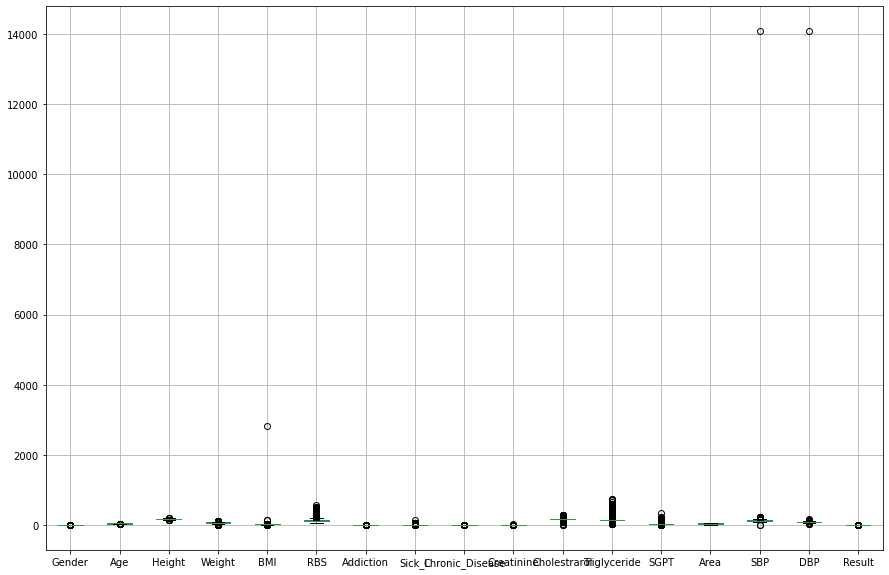

In [147]:
plt.figure(figsize=(15,10))
df.boxplot()

In [148]:
df.SBP.max()

14080.0

In [149]:
print(df.shape)

for column in df.columns:
    df.drop(index = df[df[column] == 14080].index,inplace=True)

print(df.shape)

(3958, 17)
(3957, 17)


In [150]:
df.BMI.max()

2837.37

In [151]:
print(df.shape)

for column in df.columns:
    df.drop(index = df[df[column] == 2837.37].index,inplace=True)

print(df.shape)

(3957, 17)
(3956, 17)


<AxesSubplot:>

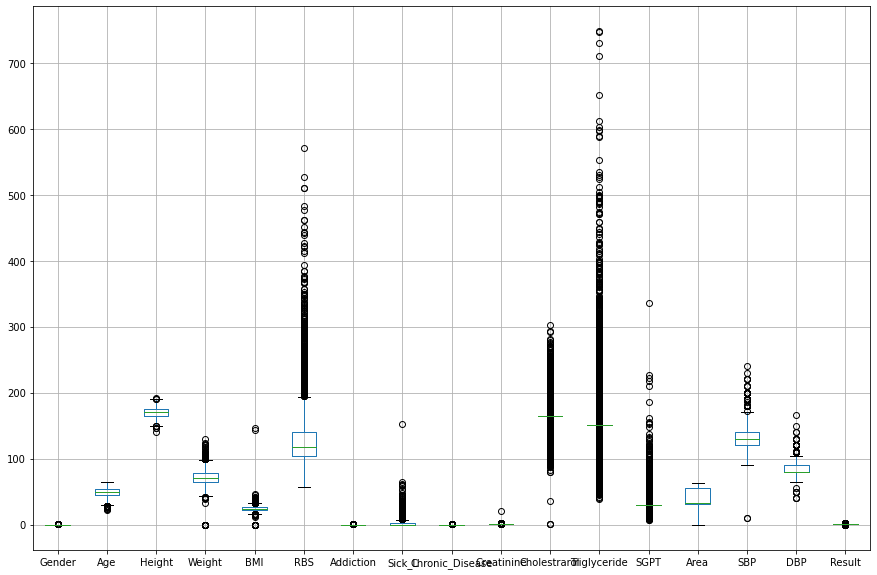

In [152]:
plt.figure(figsize=(15,10))
df.boxplot()

<AxesSubplot:>

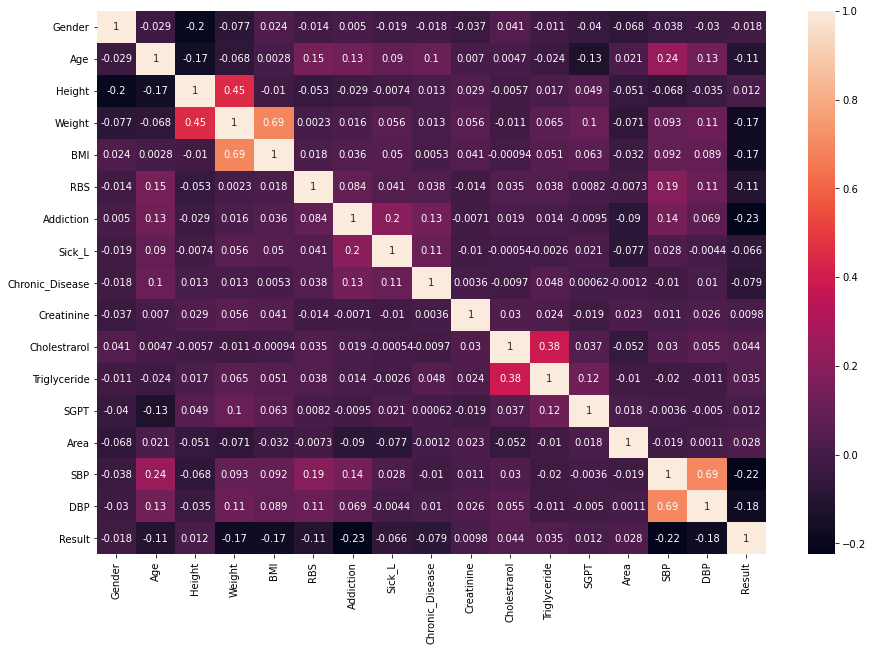

In [153]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

In [154]:
#we can remove Cholestrarol, Triglyceride, SGPT and Creatinine by stduying the boxplot and heatmap

In [155]:
df.drop(['Creatinine'],axis=1,inplace=True)

In [156]:
df.describe()

Gender          Age       Height       Weight         BMI  \
count  3956.000000  3956.000000  3820.000000  3956.000000  3956.00000   
mean      0.013903    48.606673   170.210995    70.913549    24.40407   
std       0.117103     7.507400     6.751799    11.700005     4.48126   
min       0.000000    22.000000   140.000000     0.000000     0.00000   
25%       0.000000    44.000000   165.000000    64.000000    22.23000   
50%       0.000000    50.000000   170.000000    70.000000    24.24000   
75%       0.000000    54.000000   175.000000    78.000000    26.30500   
max       1.000000    65.000000   192.000000   130.000000   147.03000   

               RBS    Addiction       Sick_L  Chronic_Disease  Cholestrarol  \
count  3956.000000  3956.000000  3954.000000      3956.000000   3956.000000   
mean    131.872346     0.131193     2.421345         0.052073    165.253311   
std      49.181679     0.337654     5.980924         0.222202     24.708304   
min      57.000000     0.000000     0.000000         0.000000      0.600000   
25%     104.000000     0.000000     0.000000         0.000000    164.000000   
50%     118.000000     0.000000     0.000000         0.000000    164.000000   
75%     140.000000     0.000000     3.000000         0.000000    164.000000   
max     570.000000     1.000000   152.000000         1.000000    303.000000   

       Triglyceride         SGPT         Area          SBP          DBP  \
count   3956.000000  3956.000000  3956.000000  3936.000000  3936.000000   
mean     161.622851    31.662538    34.376390   131.229929    83.048272   
std       65.912852    15.616569    18.971297    18.892452     8.666969   
min       39.000000     7.000000    -1.000000    10.000000    40.000000   
25%      151.000000    29.000000    31.000000   120.000000    80.000000   
50%      151.000000    29.000000    32.000000   130.000000    80.000000   
75%      151.000000    29.000000    56.000000   140.000000    90.000000   
max      748.000000   336.000000    63.000000   240.000000   166.000000   

            Result  
count  3956.000000  
mean      0.844793  
std       0.417294  
min       0.000000  
25%       1.000000  
50%       1.000000  
75%       1.000000  
max       2.000000

In [157]:
df.isnull().values.any()

True

In [158]:
df.shape

(3956, 16)

In [159]:
df.isnull().sum().sum()

178

In [160]:
df['Height'] = df['Height'].fillna(value=df['Height'].median())

In [161]:
df.isnull().sum().sum()

42

In [162]:
df['Sick_L'] = df['Sick_L'].fillna(value=df['Sick_L'].median())

In [163]:
df.isnull().sum().sum()

40

In [164]:
df['SBP'] = df['SBP'].fillna(value=df['SBP'].median())
df['DBP'] = df['DBP'].fillna(value=df['DBP'].median())

In [165]:
df.isnull().sum().sum()

0

C:\Users\SHREYANSH VINIT\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1440 with 0 Axes>

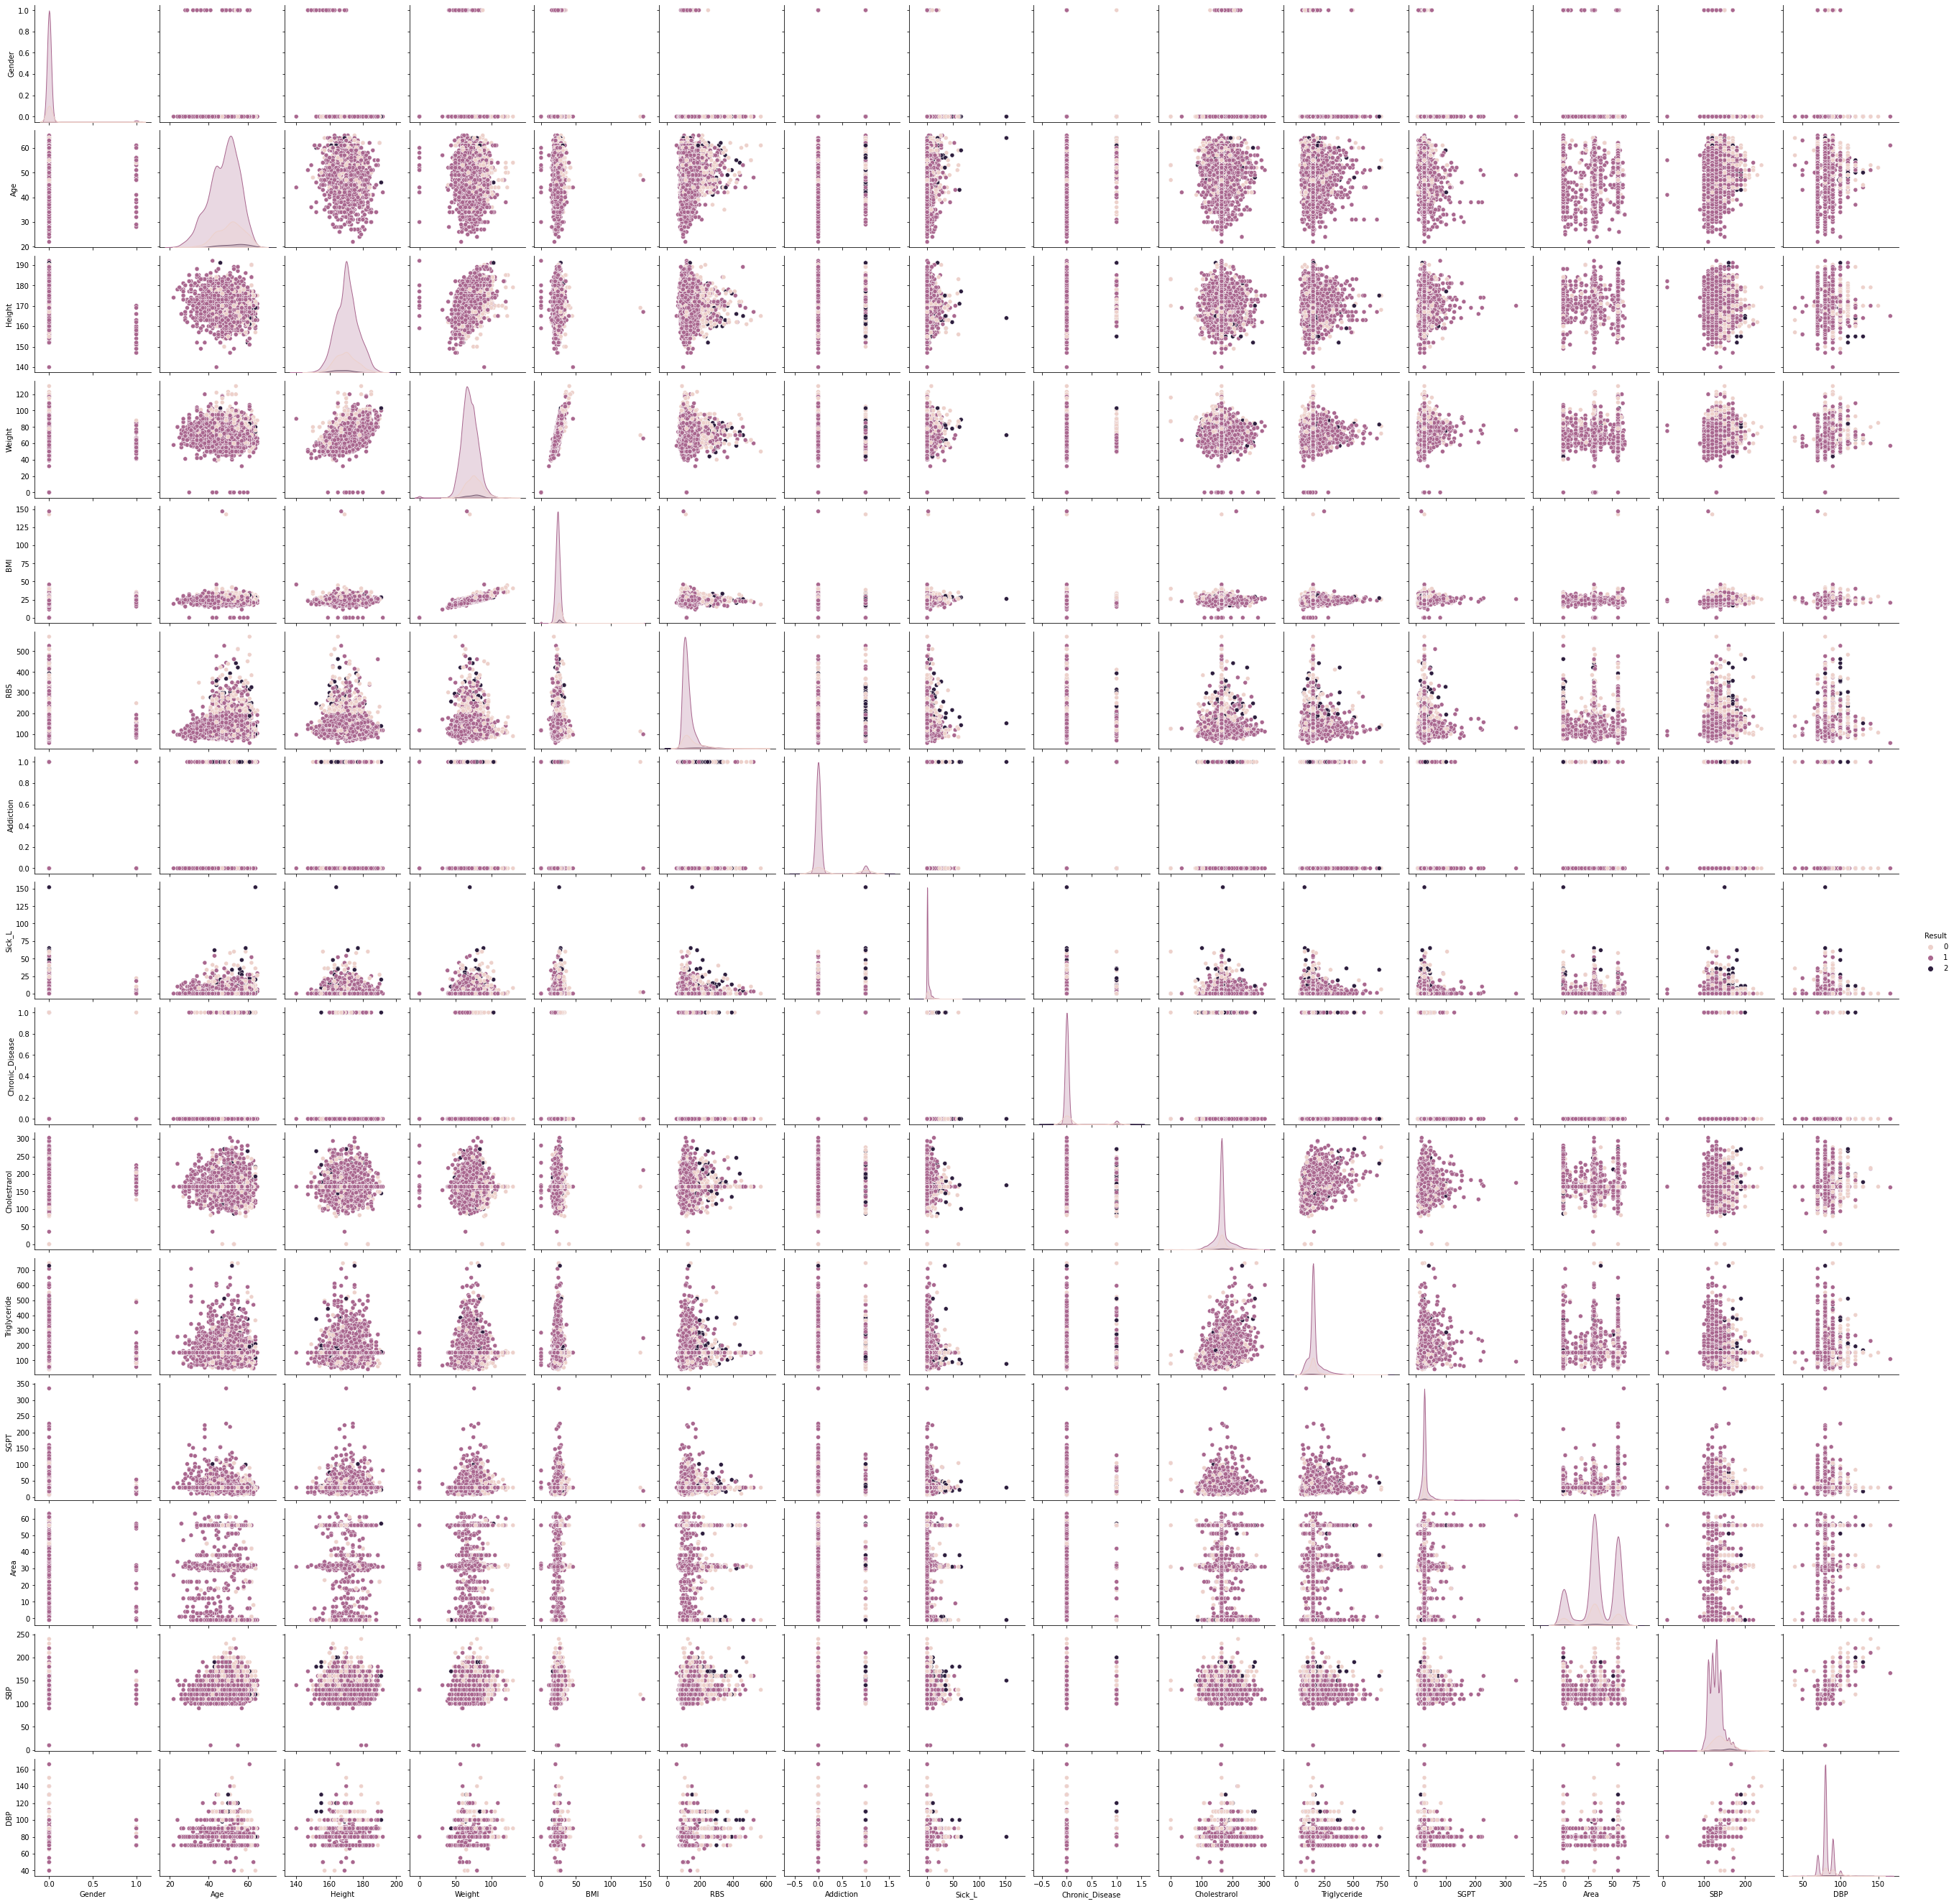

In [166]:
plt.figure(figsize=(20,20))
sns.pairplot(df , hue='Result' , diag_kind = 'kde')

<Figure size 1440x1440 with 0 Axes>

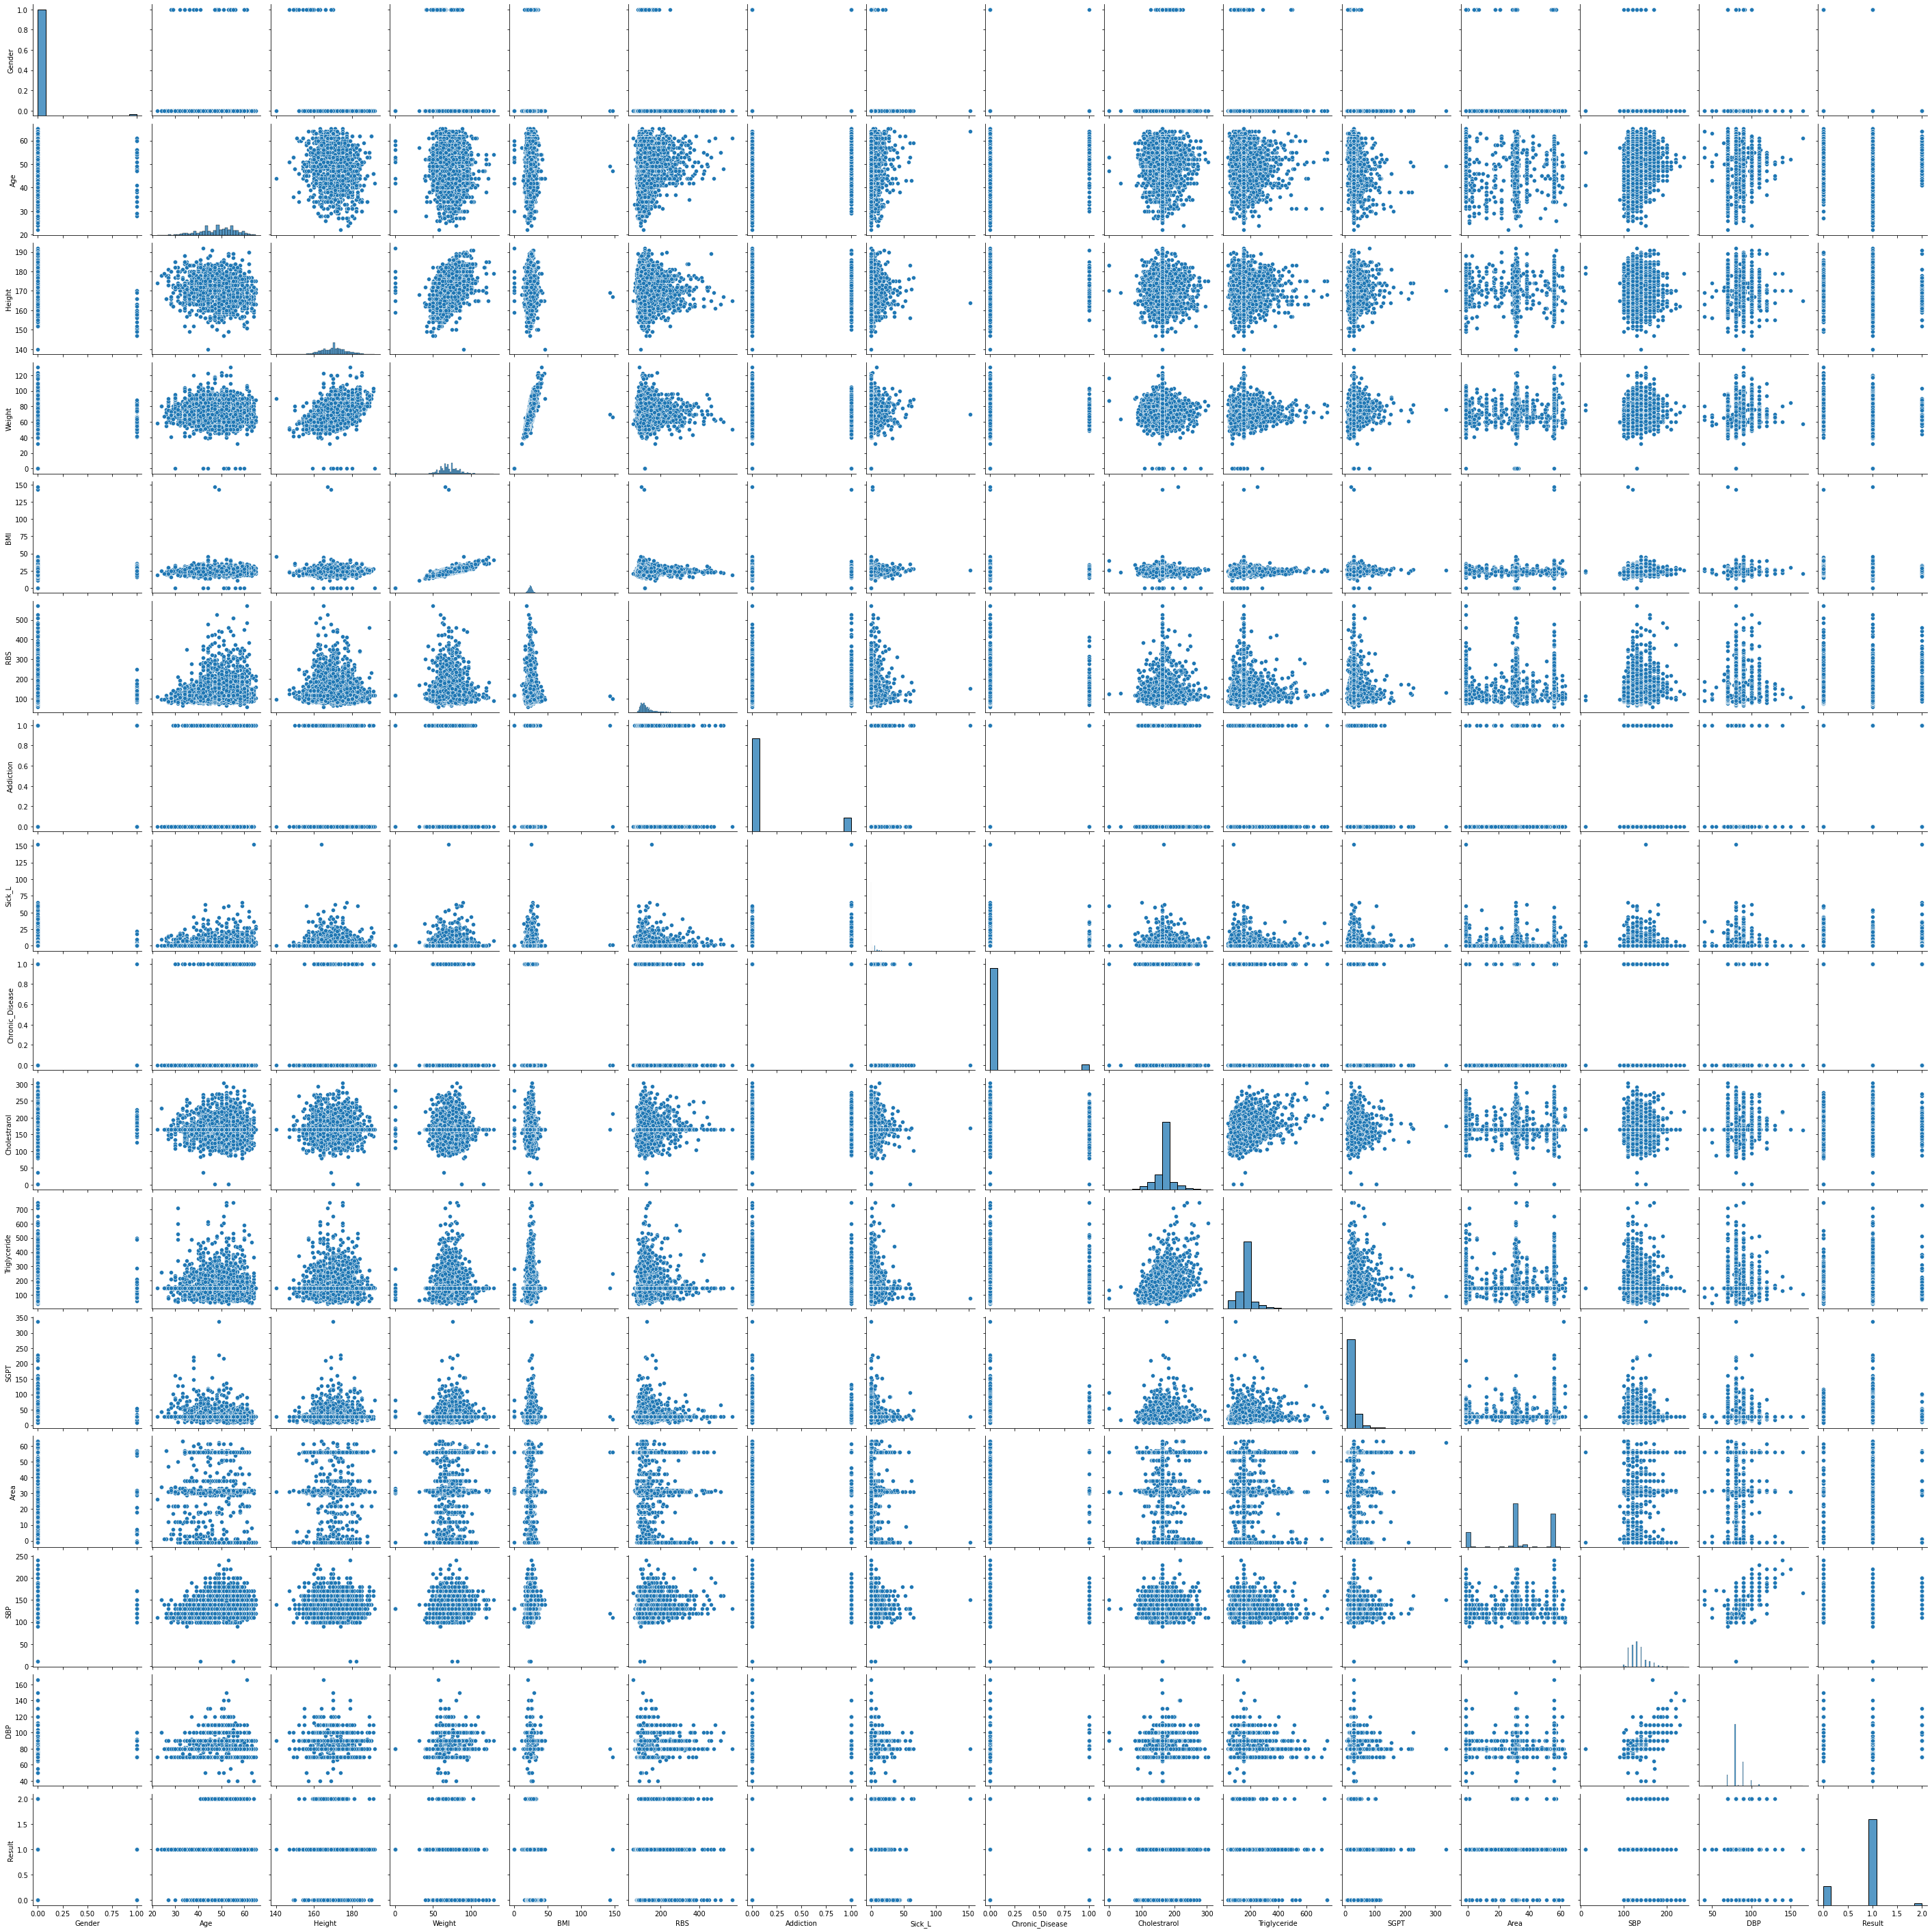

In [167]:
plt.figure(figsize=(20,20))
sns.pairplot(df)

<AxesSubplot:xlabel='Addiction', ylabel='count'>

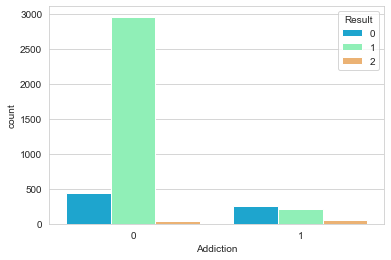

In [169]:
sns.set_style('whitegrid')
sns.countplot(x='Addiction',hue='Result',data=df,palette='rainbow')
#AverageHealth=0, BestHealth=1, PoorHealth=2

<AxesSubplot:xlabel='Chronic_Disease', ylabel='count'>

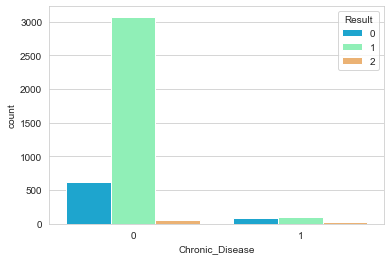

In [170]:
sns.set_style('whitegrid')
sns.countplot(x='Chronic_Disease',hue='Result',data=df,palette='rainbow')
#AverageHealth=0, BestHealth=1, PoorHealth=2

<AxesSubplot:xlabel='Gender', ylabel='count'>

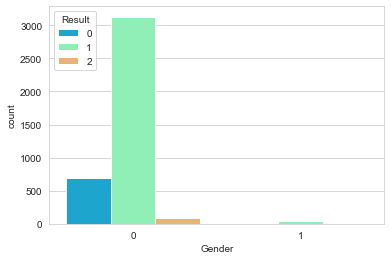

In [171]:
sns.set_style('whitegrid')
sns.countplot(x='Gender',hue='Result',data=df,palette='rainbow')
#AverageHealth=0, BestHealth=1, PoorHealth=2
#MALE=1,FEMALE=0

<AxesSubplot:xlabel='Age'>

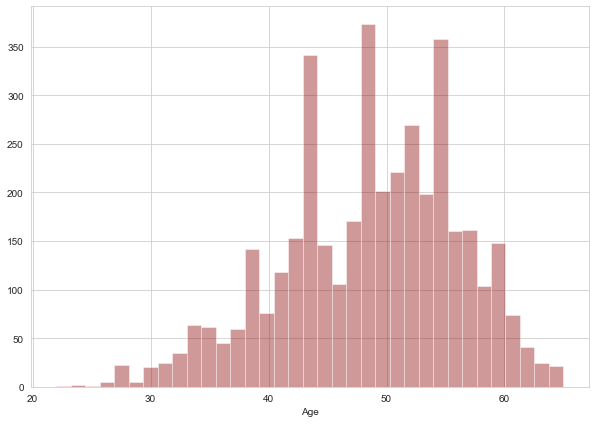

In [174]:
plt.figure(figsize=(10,7))
sns.distplot(df['Age'].dropna(),kde=False,color='darkred')

In [175]:
df.head()

Gender  Age  Height  Weight    BMI    RBS  Addiction  Sick_L  \
0       0   44   180.0      83  25.06   84.0          1     0.0   
1       0   43   169.0      72  25.21  116.0          0     4.0   
2       0   64   166.0      64  23.23   94.0          1     4.0   
3       0   64   164.0      84  31.23  102.0          1     1.0   
4       0   63   166.0      80  29.03  113.0          0    12.0   

   Chronic_Disease  Cholestrarol  Triglyceride  SGPT  Area    SBP    DBP  \
0                0         164.0         151.0  29.0    56  130.0   80.0   
1                0         218.0         153.0  29.0    32  170.0  110.0   
2                1         164.0         151.0  29.0    -1  120.0   80.0   
3                0         164.0         151.0  29.0    -1  150.0   90.0   
4                0         196.0         148.0  41.0    -1  110.0   70.0   

   Result  
0       0  
1       1  
2       0  
3       0  
4       0

In [176]:
X=df.iloc[:, :-1]
y=df.iloc[:,-1]

In [177]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
er = ExtraTreesRegressor()
er.fit(X,y)

ExtraTreesRegressor()

In [178]:
print(er.feature_importances_)

[0.00244703 0.06571042 0.06977994 0.08358162 0.09782544 0.13512679
 0.05078647 0.08233762 0.02696136 0.0517035  0.05434273 0.04956235
 0.05310974 0.1013801  0.0753449 ]


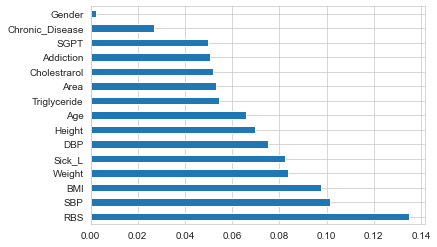

In [179]:
feat_importances = pd.Series(er.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [180]:
X=df.iloc[:, :-1].values
y=df.iloc[:,-1].values

In [181]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=41, stratify=df['Result'])

In [182]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [183]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='lbfgs',multi_class='multinomial',random_state=41)
lr.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', random_state=41)

In [184]:
y_pred=lr.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),axis=1))

[[1 1]
 [1 0]
 [1 1]
 ...
 [1 1]
 [1 1]
 [0 0]]


In [185]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[ 60  79   1]
 [ 26 609   0]
 [ 14   0   3]]


0.8484848484848485

In [186]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred,digits=3))

              precision    recall  f1-score   support

           0      0.600     0.429     0.500       140
           1      0.885     0.959     0.921       635
           2      0.750     0.176     0.286        17

    accuracy                          0.848       792
   macro avg      0.745     0.521     0.569       792
weighted avg      0.832     0.848     0.833       792



In [187]:
print('Training set score: {:.4f}'.format(lr.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(lr.score(X_test, y_test)))

Training set score: 0.8587
Test set score: 0.8485


In [189]:
print(lr.predict(sc.transform([[1,32,180,85,26.2,180,1,2,1,160,165,20,30,131,79]])))

[0]


In [117]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score